In [36]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import keras
import yfinance as yf
plt.style.use('fivethirtyeight')

In [39]:
start_date = '2015-01-01'
end_date = '2022-01-01'

ticker = 'GOOGL'

data = yf.download(ticker, start_date, end_date)
data['Date'] = data.index
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000,2015-01-02
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000,2015-01-05
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000,2015-01-06
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000,2015-01-07
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000,2015-01-08
...,...,...,...,...,...,...,...
2021-12-27,147.255997,148.343994,147.169495,147.906494,147.906494,15976000,2021-12-27
2021-12-28,148.235992,148.298996,146.054504,146.686996,146.686996,18200000,2021-12-28
2021-12-29,146.644501,147.417007,145.647507,146.654999,146.654999,17788000,2021-12-29


In [40]:
data=data.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [41]:
training_data=scaled_data[0:training_data_len , :]

xtrain=[]
ytrain=[]
n=14


In [42]:
for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , 0])
    ytrain.append(training_data[i,0])

    
xtrain , ytrain = np.array(xtrain),np.array(ytrain)

xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
ytrain.shape

(1397,)

In [43]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len: , :]
for i in range(n,len(test_data)):
    xtest.append(test_data[i-n:i,0])  

xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [44]:
initializer = keras.initializers.HeNormal()

In [124]:
# model=Sequential()
# model.add(LSTM(100, kernel_initializer=initializer,activation="relu",return_sequences=True,input_shape=(xtrain.shape[1],1)))
# Dropout(0.5),
# model.add(LSTM(50, kernel_initializer=initializer,activation="relu",return_sequences=False))
# Dropout(0.5),
# model.add(Dense(1))

model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [120]:
model.compile(optimizer='adam',loss='mean_squared_error')
hist = model.fit(xtrain,ytrain,batch_size=5,epochs=15,validation_split=0.2)

Epoch 1/15
224/224 [==============================] - 4s 10ms/step - loss: 9.4455e-04 - val_loss: 5.6058e-04
Epoch 2/15
224/224 [==============================] - 2s 8ms/step - loss: 1.9803e-04 - val_loss: 7.3131e-04
Epoch 3/15
224/224 [==============================] - 2s 8ms/step - loss: 1.5835e-04 - val_loss: 5.0511e-04
Epoch 4/15
224/224 [==============================] - 2s 8ms/step - loss: 1.4634e-04 - val_loss: 3.9119e-04
Epoch 5/15
224/224 [==============================] - 2s 8ms/step - loss: 1.3079e-04 - val_loss: 3.4141e-04
Epoch 6/15
224/224 [==============================] - 2s 8ms/step - loss: 1.2280e-04 - val_loss: 2.9519e-04
Epoch 7/15
224/224 [==============================] - 2s 8ms/step - loss: 1.0312e-04 - val_loss: 6.7140e-04
Epoch 8/15
224/224 [==============================] - 2s 8ms/step - loss: 1.0597e-04 - val_loss: 4.5652e-04
Epoch 9/15
224/224 [==============================] - 2s 8ms/step - loss: 1.0098e-04 - val_loss: 2.5141e-04
Epoch 10/15
224/224 [======

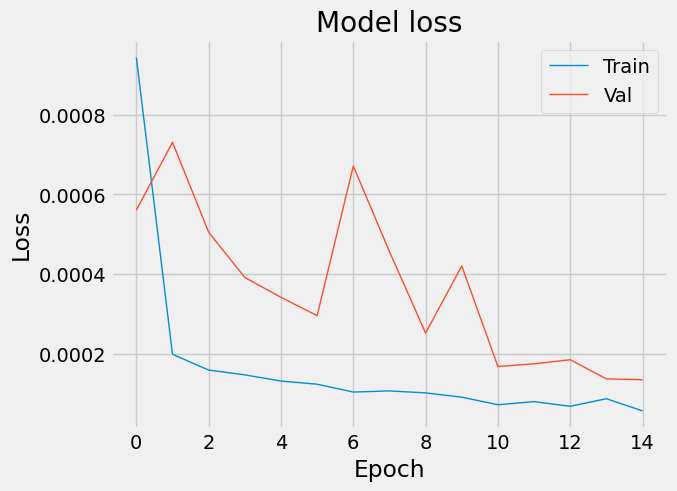

In [121]:
plt.plot(hist.history['loss'],linewidth=1)
plt.plot(hist.history['val_loss'],linewidth=1)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [123]:
prediction=model.predict(xtest)
prediction=scaler.inverse_transform(prediction)
rmse =np.sqrt(np.mean(((prediction- ytest)**2)))
print(rmse)


11/11 [==============================] - 0s 4ms/step
3.4921715307364636


In [102]:
# plt.plot(hist.history['accuracy'],linewidth=1)
# plt.plot(hist.history['val_accuracy'],linewidth=1)
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='lower right')
# plt.show()


In [103]:
# hist.history['accuracy']

In [104]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction

C:\Users\abedini-m\AppData\Local\Temp\ipykernel_14972\3517524298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


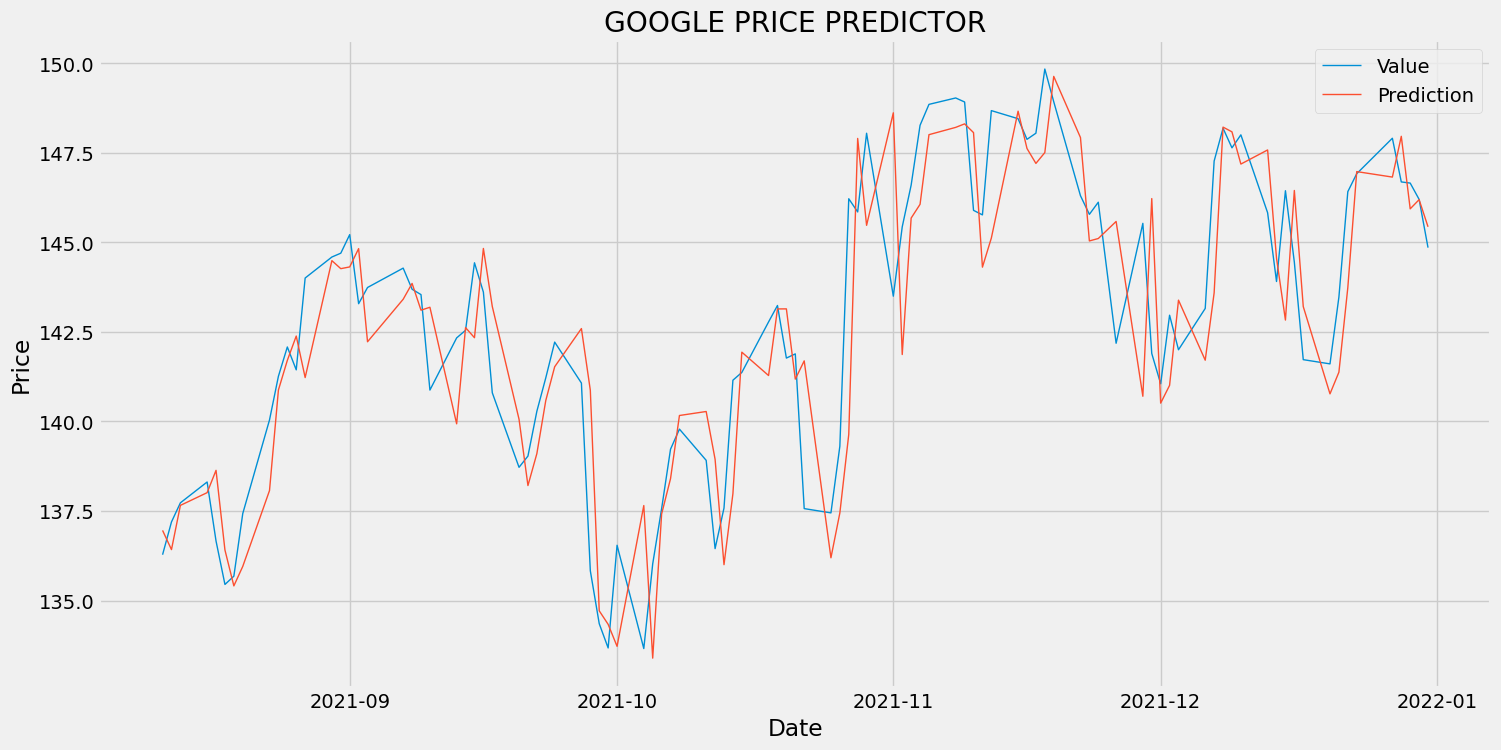

In [125]:
plt.figure(figsize=(16,8))
plt.title('GOOGLE PRICE PREDICTOR')
plt.xlabel('Date')
plt.ylabel('Price')
# plt.plot(train['Close'][-100:],linewidth=1)
plt.plot(valid[['Close','prediction']][-100:],linewidth=1)
# plt.legend(['Train','Value','Prediction'])
plt.legend(['Value','Prediction'])
plt.show()


In [61]:
forecast_range = 5
new_df = data.filter(['Close'])

new_df[-n:].values

pred_df = pd.DataFrame()
pred_df['Date'] = pd.date_range(start = data['Date'].iloc[-1] , periods = forecast_range+1 , closed = 'right')

pred_df =pred_df.set_index(pd.DatetimeIndex(pred_df['Date'].values))



KeyError: 'Date'

In [62]:
predictiondata = []

In [35]:
for i in range(0, forecast_range):
    last_values = new_df[-n:].values
    last_values_scaled = scaler.transform(last_values)
    X_input = []
    X_input.append(last_values_scaled)
    X_input = np.array(X_input)
    X_test = np.reshape(X_input, (X_input.shape[0], X_input.shape[1], 1))
    pred_value = model.predict(X_input)
    pred_value_unscaled = scaler.inverse_transform(pred_value)
    dfindex = pred_df.iloc[[i]].index 
    new_df = new_df.append(pd.DataFrame({"Close": pred_value_unscaled[0,0]}, index=dfindex))
    predictiondata.append(pred_value_unscaled[0,0])



1/1 [==============================] - 0s 177ms/step


IndexError: positional indexers are out-of-bounds

In [ ]:
new_df.tail(10)

In [ ]:
predictiondata